In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [34]:
# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5*np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples)*0.1


Degree 1 회귀 계수는 [-1.61] 입니다

Degree 1 MSE는 0.4077289625098685 입니다


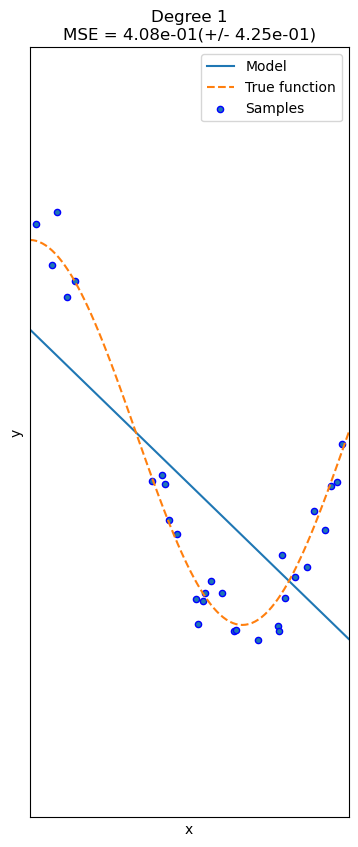


Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다

Degree 4 MSE는 0.043208749872319915 입니다


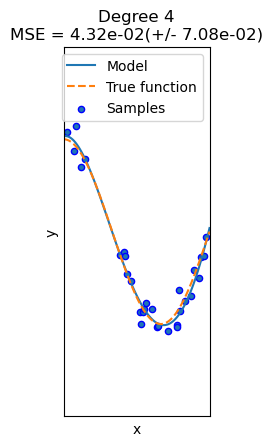


Degree 15 회귀 계수는 [-2.98293000e+03  1.03899460e+05 -1.87416299e+06  2.03716455e+07
 -1.44873481e+08  7.09316469e+08 -2.47066221e+09  6.24562239e+09
 -1.15676749e+10  1.56895282e+10 -1.54006385e+10  1.06457529e+10
 -4.91378818e+09  1.35920019e+09 -1.70381277e+08] 입니다

Degree 15 MSE는 182089952.17984512 입니다


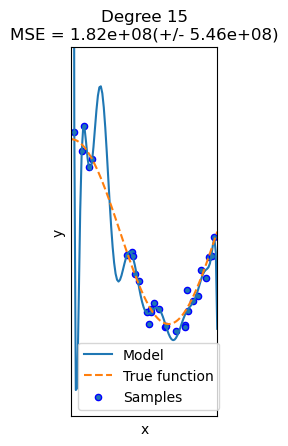

In [35]:
# 다항 회귀의 차수(degree)를 1,4,15로 각각 변화시키면서 비교합니다.
plt.figure(figsize = (14,10))
degrees = [1,4,15]

for i in range(len(degrees)):
    ax = plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())


    # 개별 degree 별로 Polyomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('polynomial_features',polynomial_features),
                         ('linear_regression',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)

    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)

    # Pipeline을 구성하는 세부 객체를 접근하는 named_step['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다'.format(degrees[i],np.round(coefficients,2)))
    print('\nDegree {0} MSE는 {1} 입니다'.format(degrees[i],-1*np.mean(scores)))

    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0,1,100)

    # 예측값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='Model')
    # 실제값 곡선
    plt.plot(X_test,true_fun(X_test),'--',label="True function")
    plt.scatter(X,y,edgecolors='b',s=20,label='Samples')

    plt.xlabel('x');plt.ylabel('y');plt.xlim((0,1));plt.ylim((-2,2));plt.legend(loc='best')
    plt.title('Degree {}\nMSE = {:.2e}(+/- {:.2e})'.format(degrees[i],-scores.mean(),scores.std()))
    plt.show()